# Explore refrigeration plant data from Widdell paper

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data_dir = "data/data_from_KNWpaper"
os.listdir(data_dir)

['04_hourly_energy_data.txt',
 '01_misc_data.txt',
 '02_SEC_monthly_data.txt',
 '03_daily_energy_data.txt']

## Load hourly data

In [3]:
file_spec = os.path.join(data_dir, "04_hourly_energy_data.txt")

with open(file_spec) as f:
    file_txt = f.read()

file_txt[:240]

'date (dd.mm.yyyy)\ttime (hh:mm)\tref_sys_1 (kW) \tel_boiler (kW)\n05.01.2021\t00:00\t123,7\t208\n05.01.2021\t01:00\t110,5\t197\n05.01.2021\t02:00\t105,4\t198\n05.01.2021\t03:00\t137,7\t206\n05.01.2021\t04:00\t112,5\t237\n05.01.2021\t05:00\t104,5\t257\n05.01.2021\t06:00'

In [4]:
df = pd.read_csv(file_spec, delimiter="\t", decimal=',')
df.shape

(240, 4)

In [5]:
df.head()

,date (dd.mm.yyyy),time (hh:mm),ref_sys_1 (kW),el_boiler (kW)
0,05.01.2021,00:00,123.7,208
1,05.01.2021,01:00,110.5,197
2,05.01.2021,02:00,105.4,198
3,05.01.2021,03:00,137.7,206
4,05.01.2021,04:00,112.5,237


In [6]:
# Combine dates and time into new index
df["datetime"] = pd.to_datetime(
    df["date (dd.mm.yyyy)"] + " " + df["time (hh:mm)"],
    format='%d.%m.%Y %H:%M'
)
df = df.set_index("datetime", drop=True)

# Strip whitespace from column names
df = df.rename(columns={col: col.strip() for col in df.columns})
df.head()

,date (dd.mm.yyyy),time (hh:mm),ref_sys_1 (kW),el_boiler (kW)
datetime,,,,
2021-01-05 00:00:00,05.01.2021,00:00,123.7,208
2021-01-05 01:00:00,05.01.2021,01:00,110.5,197
2021-01-05 02:00:00,05.01.2021,02:00,105.4,198
2021-01-05 03:00:00,05.01.2021,03:00,137.7,206
2021-01-05 04:00:00,05.01.2021,04:00,112.5,237


In [7]:
# Check index values are contingous
hrs = (df.index - df.index[0]).total_seconds().to_numpy() // 3600
assert(np.all(np.diff(hrs) == 1))

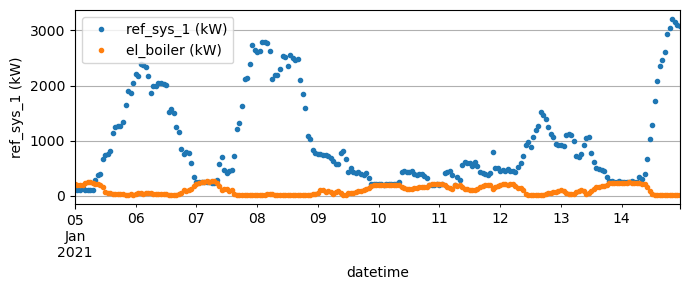

In [9]:
ax = df.plot(style='.', grid=True, figsize=(7,3))
plt.tight_layout()
plt.savefig("plots/daily_data_from_KNW_paper.pdf")